# An Introduction to Plotting and Data Analysis in Python 3

Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](mailto:python@imperial.ac.uk))

This notebook is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/)

## Overview

In the previous worksop we learned how to load data from a file and how to perform some basic statistical analysis and filtering on the imported data. We also looked at statistical distributions, and how statistical quantities characterise these. It is important to note however that the histograms that we looked at give statistical information about a single variable; for example, how frequent was the the variable temperature measured with the value T1.

In this workshop we will be looking at relations between 2 variables: if we vary the variable temperature how will the variable pressure change. In particular we will be looking at the important case of how to determine the linear relation between two variables.

## Other log plot uses

Let us load our analysis framework

    %pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In the previous workshop we saw how a logarithmic scale could be used to represent sata spanning over several order of magnitude. We can also use a log scale to reveal certain types of trends in the data.

Let us consider a exponentialy decaying function like:

$$y=A e^{-\alpha x}$$

and plot it

    x=linspace(0.01,2,50)
    expon=2*e**(-6*x)

    plot(x,expon)
    show()

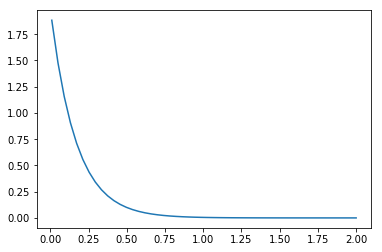

In [2]:
x=linspace(0.01,2,50)
expon=2*e**(-6*x)
plot(x,expon)
show()

What do you obtain if you use a log scale on the *y* axis?

    plot(x,expon)
    yscale('log')
    show()

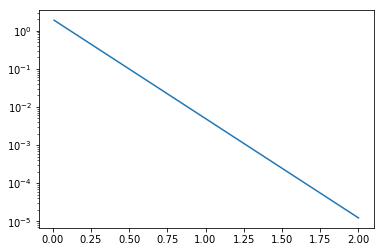

In [3]:
plot(x,expon)
yscale('log')
show()

Exponential relations are transformed to a linear plot by using a logarithmic scale. If we apply the logarithm of base 10 to the expression above we obtain:

$$\log(y)=\log(A)+\log(e^{-\alpha x})=\log(A)-\frac{\alpha}{\ln(10)}x$$,

which shows a linear relation between log(*y*) and *x*, with log(*A*) as the intercept and $-\frac{\alpha}{\ln(10)}$ as the slope (<a href="#logbase">refresher on change of base of logs</a>).

Let us now consider generic powers of *x*:

$$y=B x^{\beta}$$

and plot a few of such cases

    y1=3/x
    y2=2*x**0.5
    y3=x**2

    plot(x,y1)
    plot(x,y2)
    plot(x,y3)
    ylim([0,5])
    show()  

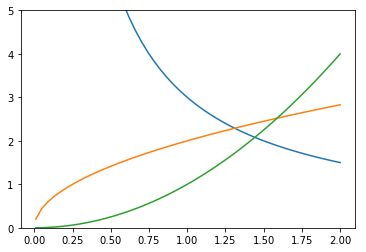

In [4]:
y1=3/x
y2=2*x**0.5
y3=x**2

plot(x,y1)
plot(x,y2)
plot(x,y3)
ylim([0,5])
show()

Now plot the same relations as before but with a logarithmic scale both for the *y* and *x* axis (choose an appropriate range for the *y* axis in this case).

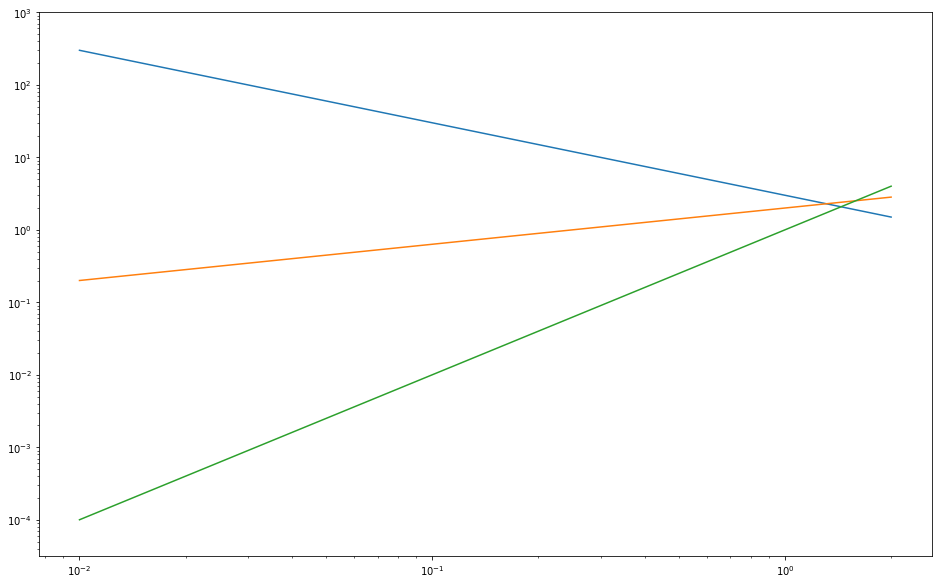

In [5]:
y1=3/x
y2=2*x**0.5
y3=x**2

figure(figsize(16,10))
plot(x,y1)
plot(x,y2)
plot(x,y3)
yscale('log')
ylim([10**-4.5,10**3])
xscale('log')
show()

Can you see why you obtain this result? What is the intercept and slope in this case?

## <a id="fitting"></a> Fitting

Fitting is a very common procedure in experimental sciences. It corresponds to the process of determining the mathematical expression that best describes the trend of some data (usually experimental measurements). Here we will focus on the case where there is a linear trend in the data, i.e. we know or suspect that in a data set *x* and *y* are related by

$$y = m x + c$$

but we don't know what the values of *m* and *c* are. The fitting process consists of determining the best estimates for *m* and *c* that describe the trend in our data. Perhaps it is better to see an example.

Let us consider the result of a set of experiments. In these experiments we vary an experimental condition (e.g. the concentration of a solution, its temperature, etc.) and take a measurement (this could be an absorbance, a conductivity, or some other measurement). Values for the the experimental conditions and subsequent measurements are recorded in the first and second column of the file 'experimental_data.txt'.

Let us first load the data from the file and take a look at it.

    raw_data=loadtxt('experimental_data.txt')
    variable=raw_data[:,0]
    measurement=raw_data[:,1]
    
    plot(variable,measurement,linestyle='',marker='^')
    show()

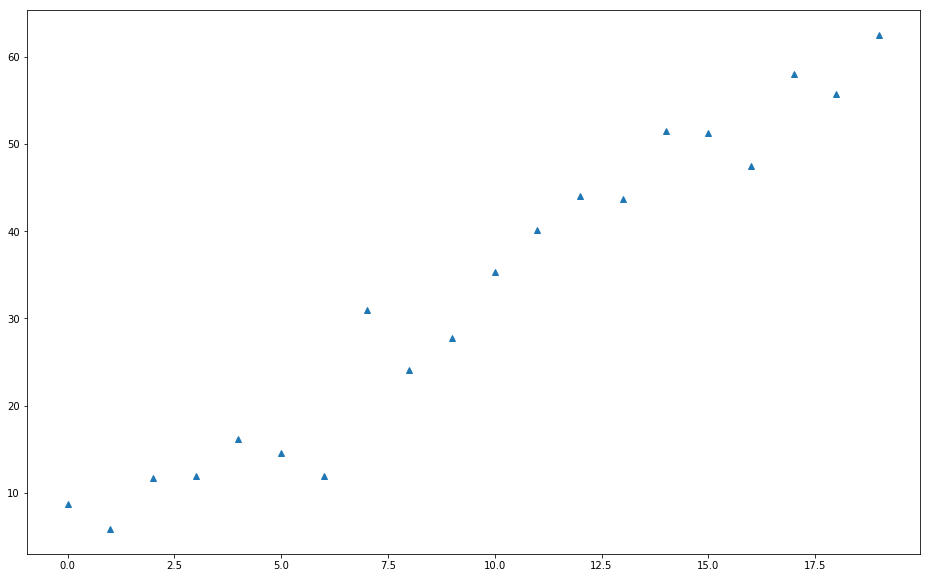

In [6]:
raw_data=loadtxt('experimental_data.txt')
variable=raw_data[:,0]
measurement=raw_data[:,1]

plot(variable,measurement,linestyle='',marker='^')
show()

We can see a general linear trend between the experimental condition and the measurement, but due to experimental errors (or perhaps something else) this trend is not perfect. A linear fit will give us the slope and intercept that best fits this data. These may be of interest to us in their own right as they could correspond to a physical quantity (the slope of the curve could give us the molar attenuation coefficient if the experimental variable were concentration and the measurement an absorption), or they could just be useful values that would allow us to perform a prediction.

We will use **polyfit** to fit our experimental data to a straight line

    polyfit(variable,measurement,1)

In [7]:
polyfit(variable,measurement,1)

array([ 3.07226478,  3.46886405])

Polyfit allows us to fit not just straight lines but also polynomials of arbitrary degree. As we're focusing on straight lines here we include a 1 as the third argument. This means we will fit to a polynomial of degree one, i.e. a straight line.

The outputs are the coefficents that define the equation we are trying to fit. For a straight line that means the gradient and the intercept of the line.

We often want some more detail about the fitting process, in particular we would like an estimate of how precise our extracted parameters are. We can get this extra information by passing in an additional keyword:

    polyfit(variable, measurement, 1, cov=True)

In [8]:
polyfit(variable,measurement,1,cov=True)

(array([ 3.07226478,  3.46886405]), array([[ 0.0288379 , -0.27396003],
        [-0.27396003,  3.56148045]]))

By adding in *cov=True* we get back an additional array (more specifically a matrix, termed the ***covariance matrix***) of four numbers. These express our uncertainty in the extracted coefficients. To be more explicit the diagonal elements of this matrix give us the variance $\sigma{}^2$ of our estimates for the coefficients: The upper left diagonal element (index [0,0]) is the variance for the gradient and the lower right diagonal element (index [1,1]) is the variance for the intercept.

In order to turn these into the standard error for the coefficient we need to take the square roots of these values. In the lines bellow we assign the fitting parameters to convenient variable names:

    fit = polyfit(variable, measurement,1, cov=True)
    params = fit[0]
    params_cov = fit[1]

In [9]:
fit=polyfit(variable,measurement,1,cov=True)
params=fit[0]
params_cov=fit[1]

Lets look at our fit prameters:

    params

In [10]:
params

array([ 3.07226478,  3.46886405])

...where the first element is the slope and the second is the intercept.

Looking now at the uncertainties:

    params_cov ** 0.5

In [43]:
params_cov ** 0.5

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[ 0.16981725,         nan],
       [        nan,  1.8871885 ]])

Looking at the result we obtain an uncertainty in the gradient of about 5.5% and an uncertainty in the intercept of about 54%. 

<div style="margin:5%">Note: The error estimation procedure followed by *polyfit()* is designed to avoid bias with a high number of points, and is slightly more conservative (larger uncertainty) than most other programs. **You should not expect the same uncertainty as when using other programs.** An unfortunate consequence of this, is that the uncertainty estimations are flawed for sample sizes of 4 points or less.</div>

These values are important for us to know but if our data is not well described by the model we have chosen (in this case a straight line) then they don't mean very much - expressing our certainty in an estimate for the single fixed gradient that characterises the process doesn't make a lot of sense if the process is not characterised by a linear relation in the first place. We shall be looking at a better method to assess the suitability of a linear fit very shortly.

We will now plot our fit together with the original data. We use the same values of the variables as in the case of the experimental data, but we will plot the predicted measurement by the fit:

    m=params[0]
    c=params[1]
    
    fitted = m * variable + c
    plot(variable, measurement, linestyle='', marker='^')
    plot(variable, fitted, linestyle='--')
    show()

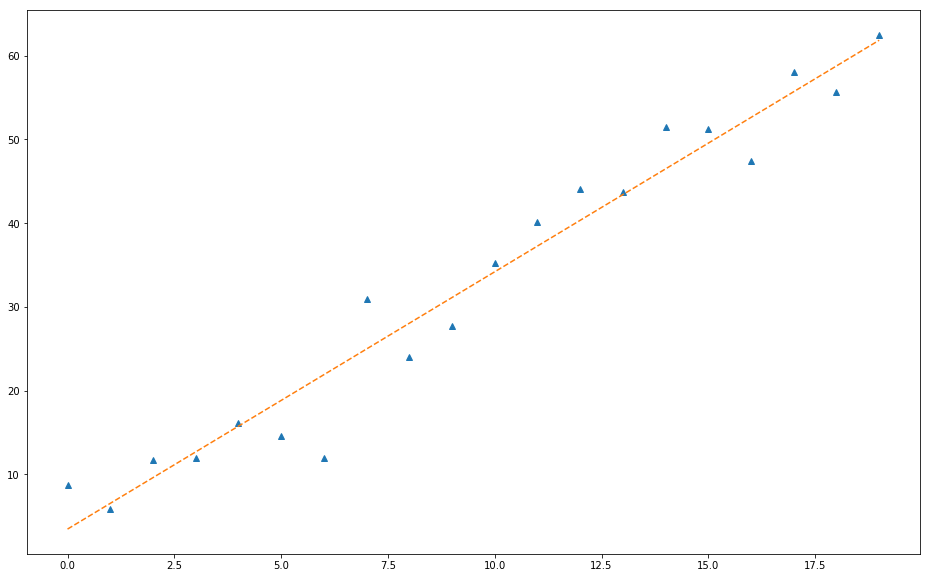

In [12]:
m=params[0]
c=params[1]

fitted=m*variable+c
plot(variable,measurement,linestyle='',marker='^')
plot(variable,fitted,linestyle='--')
show()


In addition to using the covariance matrix to gauge the accuracy of our parameters we can get an idea of whether our model choice is reasonable by computing and examining the *residuals*. These are the differences between the predictions we are making using our model (fitted line) and the actual measured data.

    residuals = measurement - fitted

In [13]:
residuals=measurement-fitted

We then plot the residuals directly and a line along y=0 for comparison:

    plot(variable, residuals, marker='^', linestyle='')
    plot(array([variable[0],variable[-1]]), array([0,0]),linestyle='--')
    show()

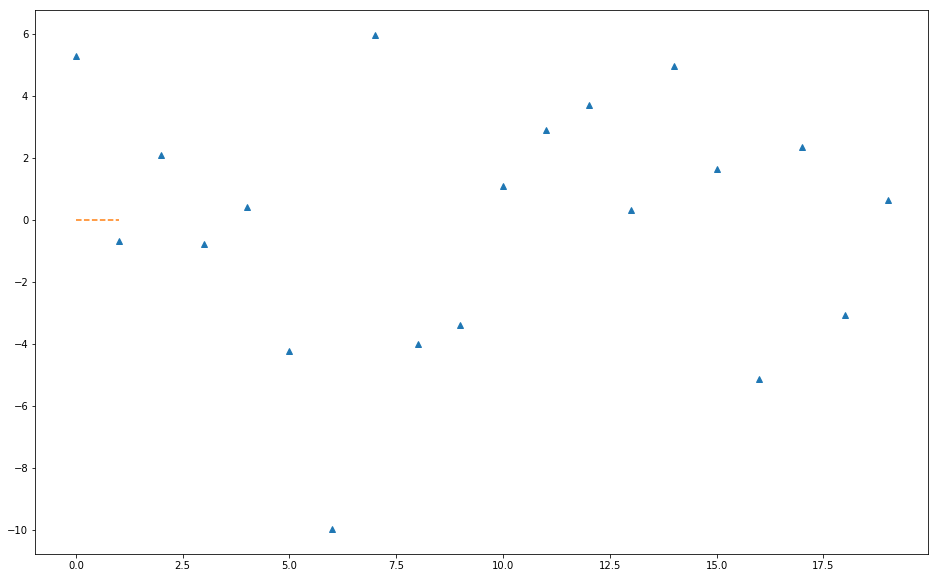

In [14]:
plot(variable,residuals,marker='^',linestyle='')
plot(array([variable[0],variable[1]]),array([0,0]),linestyle='--')
show()

Notice that the residuals are clustered close to 0 and we see no obvious trend in their distribution. A clear trend in the residuals is an indicator that our model choice (in this case a straight line) is not capturing all the structure of our data and hence could be improved. 

### One should not fit blindly

Suppose we have some measurements and we know the relationship between the variables should be linear (i.e. they should lie on a straight line)

Let's look at the following data:

    x= arange(1.0,100,4)
    y = array([ 0.03231454,  0.13898134,  0.2713996 ,  0.3306628 ,  0.43943964,  0.55986173,  0.65984714,  0.78631773,
            0.89412865,  0.98014824,  1.06925855,  1.14170126,  1.20720018,  1.31978907,  1.28525302,  1.34782115,
            1.31360386,  1.43122401,  1.40408662,  1.38122363,  1.39562417,  1.34654361,  1.42412321,  1.3962572 ,
            1.31714601])
    plot(x,y, marker='^', linestyle='')
    show()

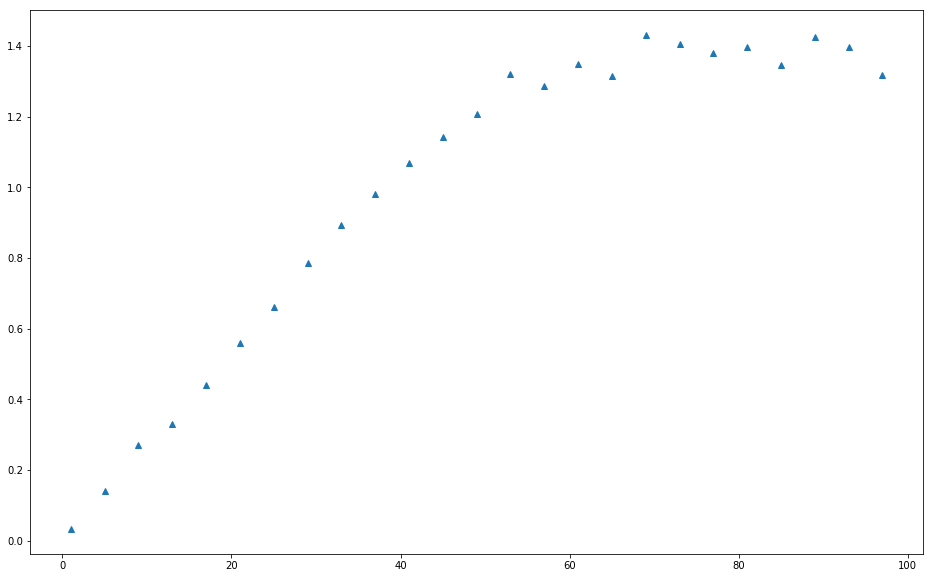

In [15]:
x=arange(1.0,100,4)
y=array([0.03231454,0.13898134,0.2713996,0.3306628,0.43943964,0.55986173,0.65984714,0.78631773,0.89412865,0.98014824,1.06925855,1.14170126,1.20720018,1.31978907,1.28525302,1.34782115,1.31360386,1.43122401,1.40408662,1.38122363,1.39562417,1.34654361,1.42412321,1.3962572,
        1.31714601])
plot(x,y,marker='^',linestyle='')
show()

We can see that the data is not a straight line throughout. The straight line portion of the curve we are interested in is at the beginning, ending somewhere around x=40/y=1.1 i.e. the 11th data point.

First we'll try applying our linear fit to the entire set of data:

bad_fit = polyfit(x, y, 1, cov=True)
    bad_params = bad_fit[0]
    bad_params_cov = bad_fit[1]

In [16]:
bad_fit=polyfit(x,y,1,cov=True)
bad_params=bad_fit[0]
bad_params_cov=bad_fit[1]

Let's plot the data with the bad fit to data:

    bad_m = bad_params[0]
    bad_c = bad_params[1]
    
    bad_fitted_y = bad_m*x + bad_c
    
    plot(x,y, linestyle='', marker='^')
    plot(x, bad_fitted_y, linestyle='--', color='red')
    show()
    

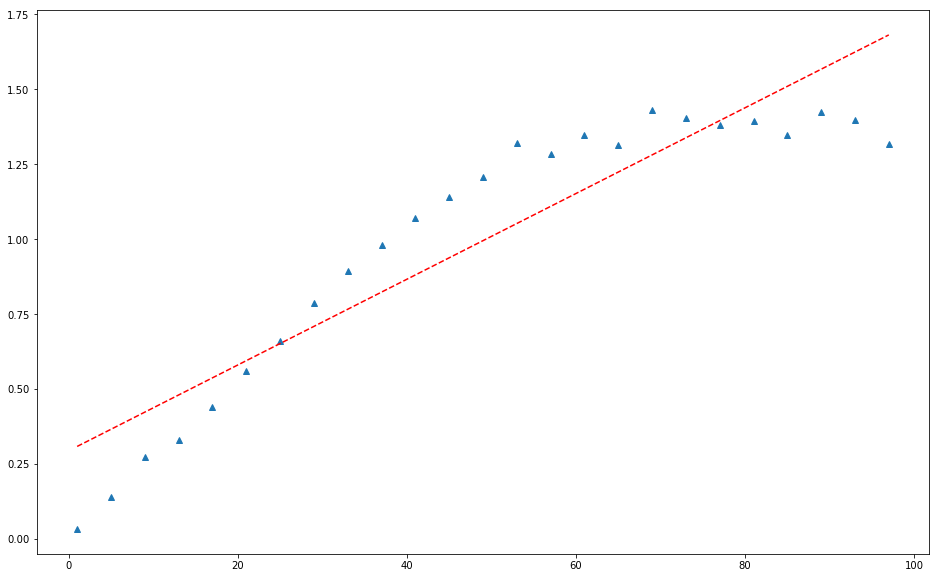

In [17]:
bad_m=bad_params[0]
bad_c=bad_params[1]
bad_fitted_y=bad_m*x+bad_c
plot(x,y,linestyle='',marker='^')
plot(x,bad_fitted_y,linestyle='--',color='red')
show()

And the residuals

    bad_res = y - bad_fitted_y
    
    plot(x, bad_res, marker='^', linestyle='', color='red')
    plot(array([x[0],x[-1]]),array([0,0]),linestyle='--')
    show()

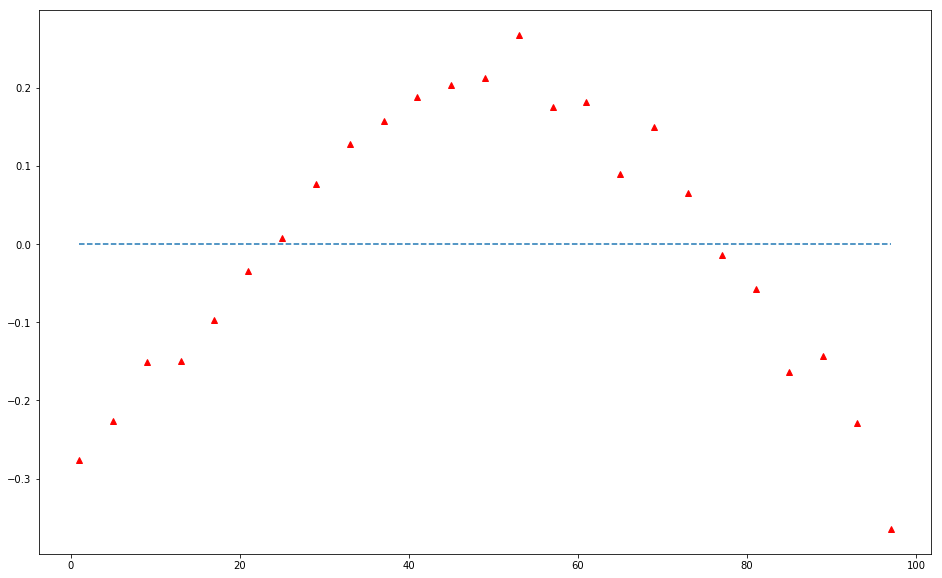

In [18]:
bad_res=y-bad_fitted_y
plot(x,bad_res,marker='^',linestyle='',color='red')
plot(array([x[0],x[-1]]),array([0,0]),linestyle='--')
show()

We note that the residuals don't have a random distribution around zero, they present a curved pattern. A clear pattern in the residuals indicates the fit is not ideal. Note that the value of the uncertainties of the parameters do not provide an indication of whether your model/fit function is not a good description of your data points. 

Plotting the residuals will give you a hint.

Now we'll try restricting our fit to the linear portion of the data. We first select the data we are interested in using the index then we apply our fit to the restricted dataset.
    
    fitting_xdata = x[:11]
    fitting_ydata = y[:11]

    good_fit = polyfit(fitting_xdata, fitting_ydata, 1, cov=True)
    good_params = good_fit[0]
    good_params_cov = good_fit[1]

In [19]:
fitting_xdata=x[:11]
fitting_ydata=y[:11]
good_fit=polyfit(fitting_xdata,fitting_ydata,1,cov=True)
good_params=good_fit[0]
good_params_cov=good_fit[1]

We see the values we get for the gradient and intercept are quite different:

    bad_params

In [20]:
bad_params

array([ 0.01430734,  0.29389879])

    good_params

In [21]:
good_params

array([ 0.02624839,  0.00899833])

If we visualize both fits we'll see why.

    good_m = good_params[0]
    good_c = good_params[1]

    good_fitted_y = good_m*x + good_c

    plot(x,y, linestyle='', marker='^')
    plot(x, bad_fitted_y, linestyle='--', color='red', label='full fit')
    plot(x, good_fitted_y, linestyle='--', color='green', label='partial fit')
    legend(loc='center right')
    
    ylim([0,1.6])
    show()

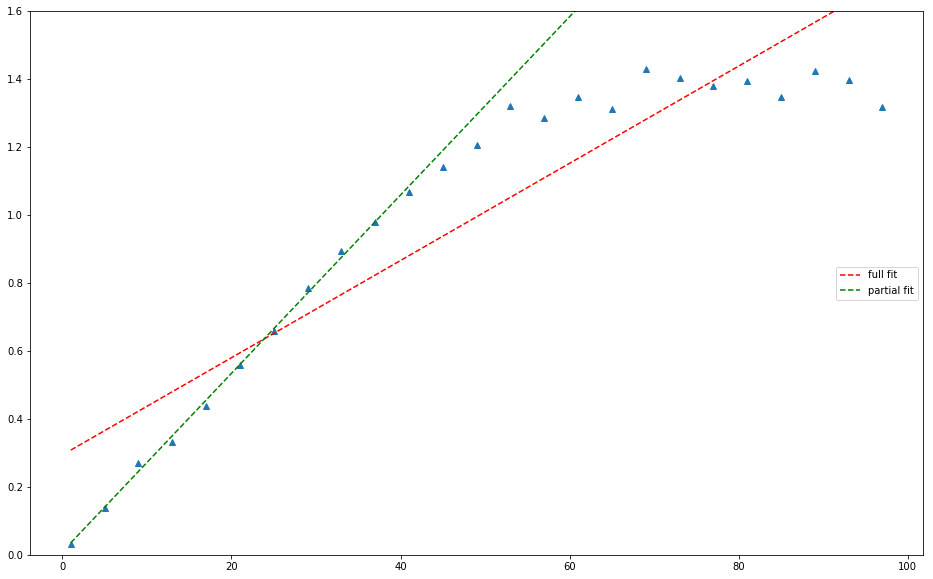

In [22]:
good_m=good_params[0]
good_c=good_params[1]
good_fitted_y=good_m*x+good_c

plot(x,y,linestyle='',marker='^')
plot(x,bad_fitted_y,linestyle='--',color='red',label='full fit')
plot(x,good_fitted_y,linestyle='--',color='green',label='partial fit')
legend(loc='center right')
ylim([0,1.6])
show()

The partial fit matches the linear portion of the data that we are interest in whilst the full fit is skewed by the presence of the excess non linear data.

To confirm that our partial fit is adequate in the range we chose we plot the residuals:

    good_res = y[:11] - good_fitted_y[:11]
    
    plot(x, bad_res, marker='^', linestyle='', color='red', label='full_fit')
    plot(fitting_xdata, good_res, marker='^', linestyle='', color='green', label='partial_fit')
    plot(array([x[0],x[-1]]),array([0,0]),linestyle='--')
    show()

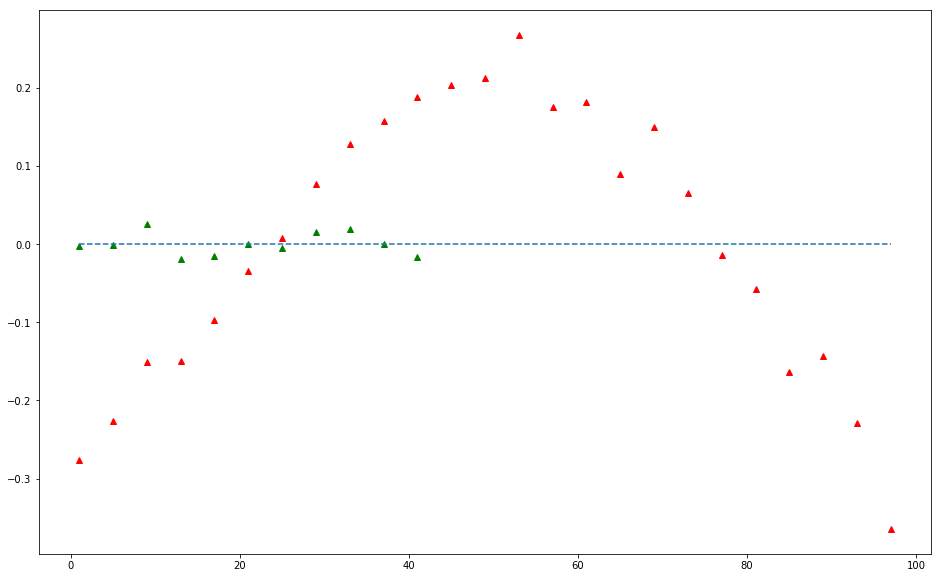

In [23]:
good_res=y[:11]-good_fitted_y[:11]
plot(x,bad_res,marker='^',linestyle='',color='red',label='full_fit')
plot(fitting_xdata,good_res,marker='^',linestyle='',color='green',label='partial_fit')
plot(array([x[0],x[-1]]),array([0,0]),linestyle='--')
show()

## Weighted Fits

Thus far our fitting process has assumed all the data points are equally significant. In many cases however we know that some of the measurements we have made are much more uncertain than others, we'd like to provide the fitting algorithm with this information so that when it tries to find the best gradient and intercept it cares more about the points we have greater certainty in than those we have less certainty in.

Let's imagine we have some measurements of the pressure of a nobel gas in a fixed container as the temperature is increased. 

Lets look at the data:

    gas_data = loadtxt('ideal_gas_data.txt')
    temp = gas_data[:,0]
    pressure = gas_data[:,1]

    plot(temp, pressure, marker='^', linestyle='')
    xlabel('T /K')
    ylabel('p /Pa')
    show()

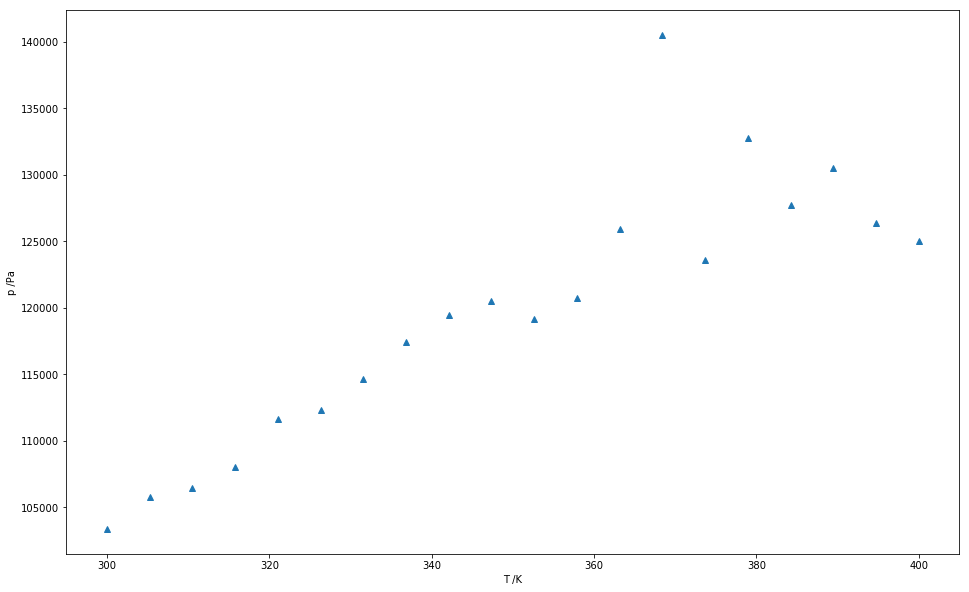

In [24]:
gas_data=loadtxt('ideal_gas_data.txt')
temp=gas_data[:,0]
pressure=gas_data[:,1]

plot(temp,pressure,marker='^',linestyle='')
xlabel('T /K')
ylabel('p /Pa')
show()

We believe that the nobel gas obeys the equation $pV=nRT$ where *p* is pressure, *V* volume, n the number of moles of gas, *R* the ideal gas constant and *T* is the temperature. 

Hence that if we plot pressure against temperature fixing *n* and *V*, we should have a straight line with gradient equat to *nR/V*. We will use the fact that we know we have 1 mole of gas and that the volume of the box is 2.4 &times; 10<sup>-2</sup> m<sup>3</sup> to determine an estimate for the gas constant. 

We also know that the instrument we used to measure the pressure becomes less and less precise the hotter it gets. Infact let us suppose that our instrument is calibrated to perform perfect measurements at zero degrees Celsius (this is an idealization of course), but that the error associated with our measurements grows as the square of the temperature above zero degrees Celsius. We'll use the **errorbar** function to visualise our data together with the uncertainty.

    std_e = (temp-273)**2

    errorbar(temp, pressure, marker='^', linestyle='', yerr=std_e) 
    xlabel('T /K')
    ylabel('p /Pa')
    show()

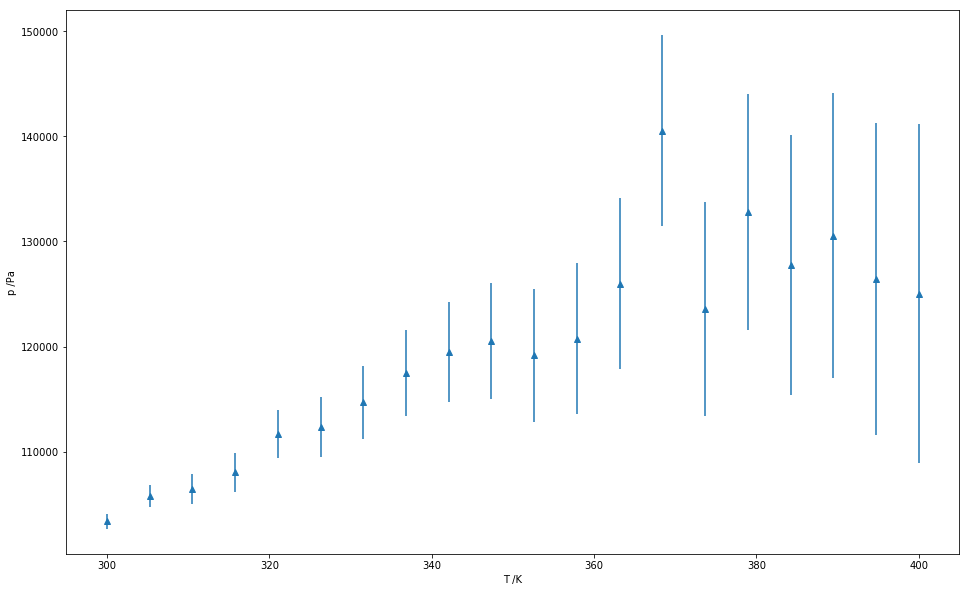

In [25]:
std_e=(temp-273)**2
errorbar(temp,pressure,marker='^',linestyle='',yerr=std_e)
xlabel('T /K')
ylabel('p /Pa')
show()

Now that we have set the scene let's try fitting a straight line to our data and extracting an estimate for the ideal gas constant. Treating all the points equally we get the following:
    
    fit_nw = polyfit(temp, pressure, 1, cov=True)
    params_nw = fit_nw[0]
    params_nw_cov = fit_nw[1]

In [26]:
fit_nw=polyfit(temp,pressure,1,cov=True)
params_nw=fit_nw[0]
params_nw_cov=fit_nw[1]

    params_nw

In [27]:
params_nw

array([   276.87314064,  22707.70527628])

    params_nw_cov ** 0.5

In [28]:
params_nw_cov**0.5

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[    37.9412362 ,             nan],
       [            nan,  13329.26186063]])

The graphical representation is:

    m_nw = params_nw[0]
    c_nw = params_nw[1]

    errorbar(temp, pressure, marker='^', linestyle='', yerr=std_e)
    plot(temp, m_nw*temp + c_nw, linestyle='--')
    xlabel('T /K')
    ylabel('p /Pa')
    show()

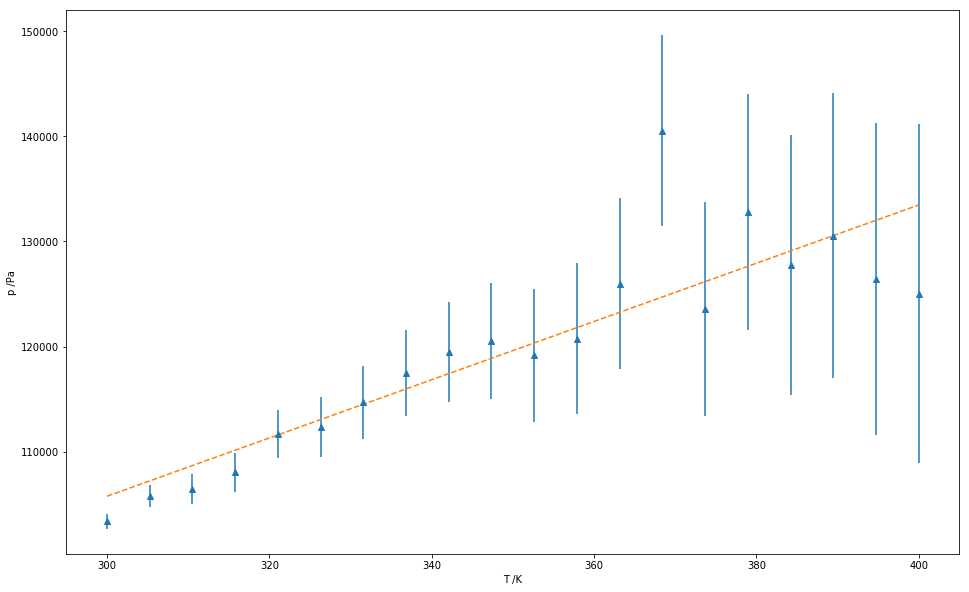

In [29]:
m_nw=params_nw[0]
c_nw=params_nw[1]

errorbar(temp,pressure,marker='^',linestyle='',yerr=std_e)
plot(temp,m_nw*temp+c_nw,linestyle='--')
xlabel('T /K')
ylabel('p /Pa')
show()

Our uncertainty for the gradient is significant and our estimate for *R* is poor. Now we'll fit and provide weights to tell polyfit how significant the points are. The standard way of weighting is to weight a point by the inverse of the variance, i.e. 1/(&sigma;<sup>2</sup>). This will mean the points with the largest uncertainty have the smallest weights which is what we want.

    fit_w = polyfit(temp, pressure, 1, cov=True, w=1/std_e**2)
    params_w = fit_w[0]
    params_w_cov = fit_w[1]

In [30]:
fit_w=polyfit(temp,pressure,1,cov=True,w=1/std_e**2)
params_w=fit_w[0]
params_w_cov=fit_w[1]

    params_w

In [31]:
params_w

array([  349.82904672, -1512.65486172])

    params_w_cov ** 0.5

In [32]:
params_w_cov**0.5

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[   17.83870777,            nan],
       [           nan,  5390.51146205]])

Notice that the error in the gradient has decreased significantly and our estimate for *R* is now much closer to the true ideal gas constant.

We plot the two fits together and note the effect of the smaller weight of the points at higher temperature on the weighted fit

    m_w = params_w[0]
    c_w = params_w[1]
    
    errorbar(temp, pressure, marker='^', linestyle='', yerr=std_e)
    plot(temp, m_nw*temp + c_nw, linestyle='--', color='red', label='not weighted')
    plot(temp, m_w*temp + c_w, linestyle='--', color='green', label='weighted')
    legend()
    xlabel('T /K')
    ylabel('p /Pa')
    show()

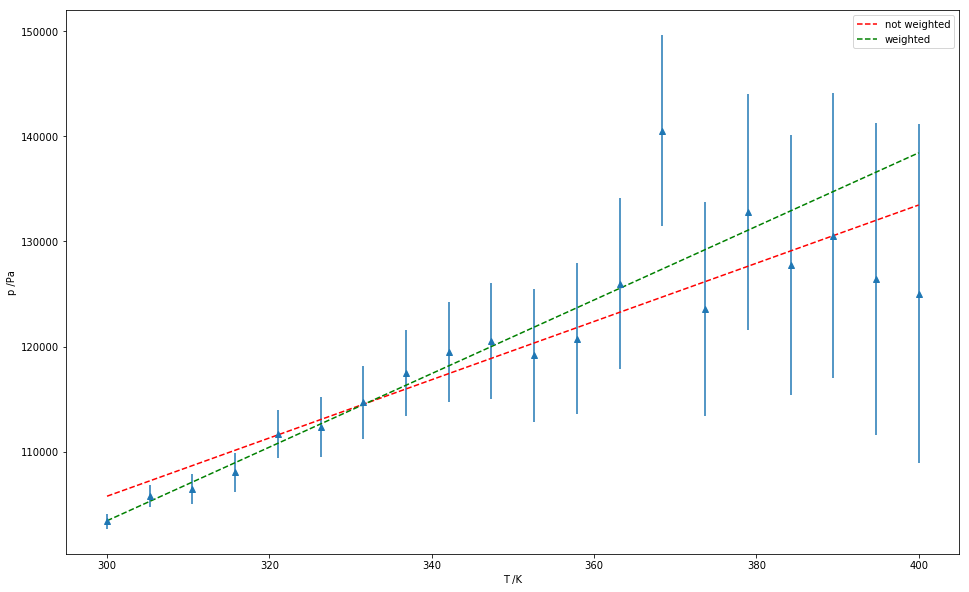

In [33]:
m_w=params_w[0]
c_w=params_w[1]

errorbar(temp,pressure,marker='^',linestyle='',yerr=std_e)
plot(temp,m_nw*temp+c_nw,linestyle='--',color='red',label='not weighted')
plot(temp,m_w*temp+c_w,linestyle='--',color='green',label='weighted')
legend()
xlabel('T /K')
ylabel('p /Pa')
show()

## Summary

In this workshop we covered several important data analysis methods you will use through out your degree and career.

We looked in some detail at the important case of how to fit a linear function to a set of experimental measurements. How to extract the parameters that best describe the data and thee statistical uncertainties of those parameters (stored in the diagonal of the covarience matrix). 

When fitting experimental data one should always be critical and check that the fitting function reasonably describes the data. One way of doing that is to look at the plot of the residuals of the fit. When fitting data, it is common that different points have different associated uncertainties, in this case one should weight each point by the inverse of the associated variance.

While linear fits are very common in many areas of chemistry, in the next workshop we will look at how to fit arbitrary non-linear functions.

# Exercises

### Exercise 1

File [zn_flame.txt](files/zn_flame.txt) stores calibration data for an atomic absoption flame spectrophotometer. The left column corresponds to concentration of the Zn<sup>2+</sup> in mg.dm<sup>-3</sup>, and the following 4 columns correspond to absorbance readings.

* Look at the content of the file, and then load the data into a variable.

In [34]:
zn_flame=loadtxt('zn_flame.txt')
zn_conc=zn_flame[:,0]
zn_ab0=zn_flame[0,1:]
zn_ab02=zn_flame[1,1:]
zn_ab04=zn_flame[2,1:]
zn_ab06=zn_flame[3,1:]
zn_ab08=zn_flame[4,1:]
zn_ab1=zn_flame[5,1:]
zn_ab=zn_flame[:,1:]
m_zn_ab1=mean(zn_ab,axis=1)
m_zn_ab1

array([-0.00025,  0.04625,  0.09175,  0.1375 ,  0.178  ,  0.2215 ])

In [35]:
zn_flame

array([[ 0.   ,  0.   ,  0.   ,  0.   , -0.001],
       [ 0.2  ,  0.046,  0.046,  0.046,  0.047],
       [ 0.4  ,  0.092,  0.092,  0.091,  0.092],
       [ 0.6  ,  0.138,  0.138,  0.138,  0.136],
       [ 0.8  ,  0.178,  0.179,  0.178,  0.177],
       [ 1.   ,  0.22 ,  0.221,  0.223,  0.222]])

* Calculate the mean absorbance associated with each concentration, and create a figure containing a plot of mean absorbance as a function of concentrations making sure to label your axes appropriately.

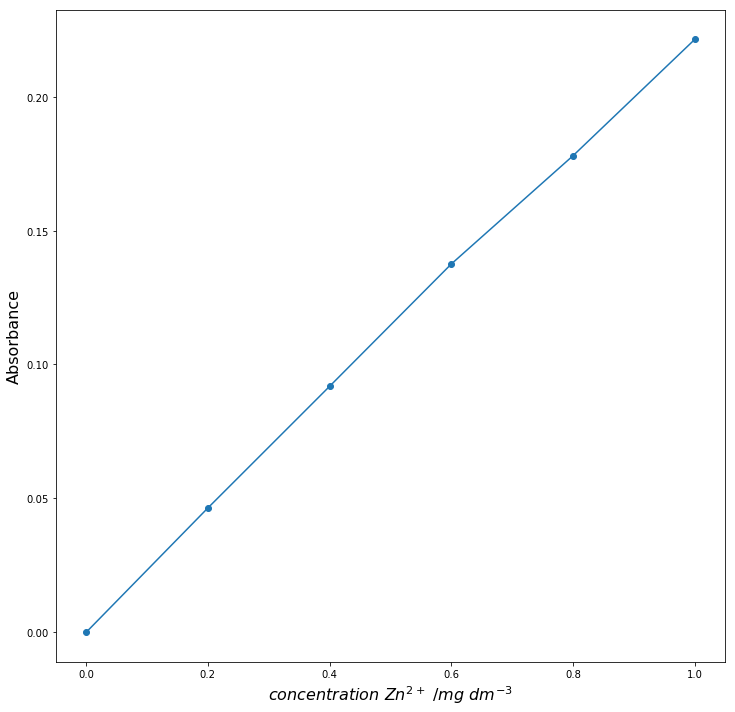

In [36]:
m_zn_ab0=mean(zn_ab0)
m_zn_ab02=mean(zn_ab02)
m_zn_ab04=mean(zn_ab04)
m_zn_ab06=mean(zn_ab06)
m_zn_ab08=mean(zn_ab08)
m_zn_ab1=mean(zn_ab1)

m_zn_ab=([m_zn_ab0,m_zn_ab02,m_zn_ab04,m_zn_ab06,m_zn_ab08,m_zn_ab1])
figure(figsize(12,12))
plot(zn_conc,m_zn_ab,marker='o',linestyle='-')
xlabel('$ concentration\ Zn^{2+}$ /$ mg\ dm^{-3}$',fontsize=16)
ylabel('Absorbance',fontsize=16)
show()

* Calculate the standard error associate with mean absorbances and generate plot including errorbars defined by the standard error.

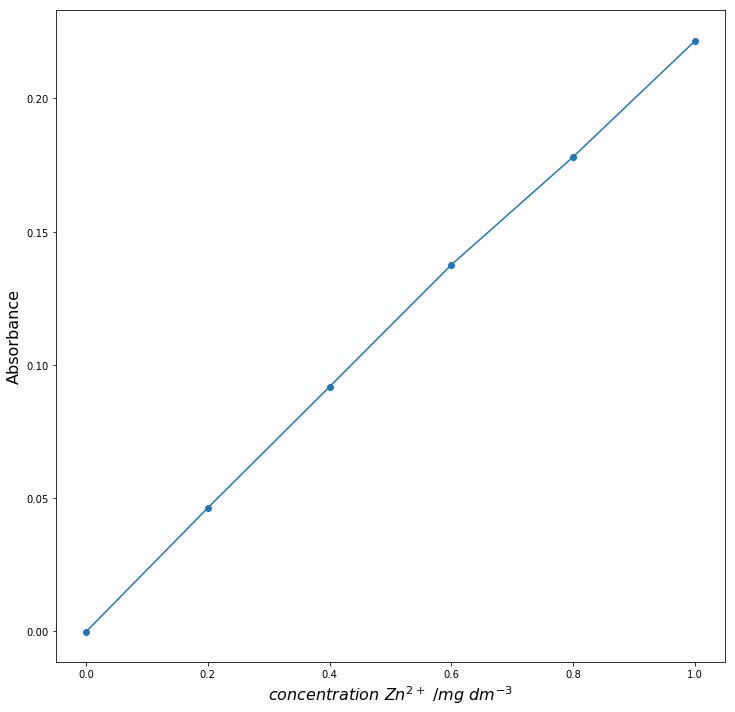

In [37]:
zn_ab_stde=std(zn_flame[:,1:],ddof=1,axis=1)/(2)
xlabel('$ concentration\ Zn^{2+}$ /$ mg\ dm^{-3}$',fontsize=16)
ylabel('Absorbance',fontsize=16)
errorbar(zn_conc,m_zn_ab,marker='o',linestyle='-',yerr=zn_ab_stde)
zn_ab_stde
show()

* Do a linear fit of the mean absorbance against concentration data, **taking into account the uncertainty associated with each point**. Plot your fit along with the experimental data.

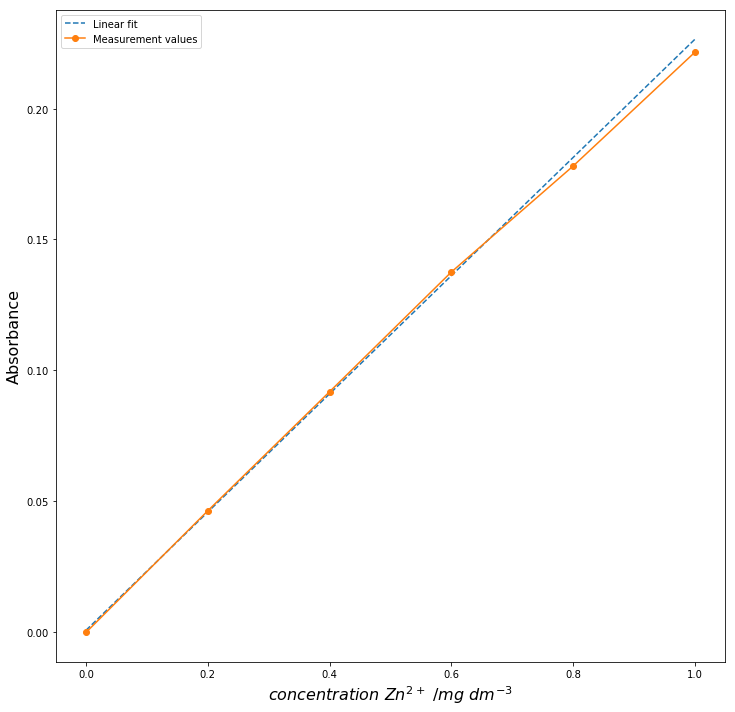

In [38]:
fit_ab=polyfit(zn_conc,m_zn_ab,1,cov=True,w=1/((zn_ab_stde)**2))
params_ab=fit_ab[0]
m_ab=params_ab[0]
c_ab=params_ab[1]
plot(zn_conc,m_ab*zn_conc+c_ab,linestyle='--',label='Linear fit')
plot(zn_conc,m_zn_ab,marker='o',linestyle='-',label='Measurement values')
xlabel('$ concentration\ Zn^{2+}$ /$ mg\ dm^{-3}$',fontsize=16)
ylabel('Absorbance',fontsize=16)
legend()
show()

* Plot the residuals of your fit

The Lambert-Beer law predicts a linear relation between concentration and absorbance. Examine the plot you produced above and consider the residuals (bear in mind that it's hard to spot patterns if there are few data points - see exercise 2) do you think the data obeys a linear relationship?

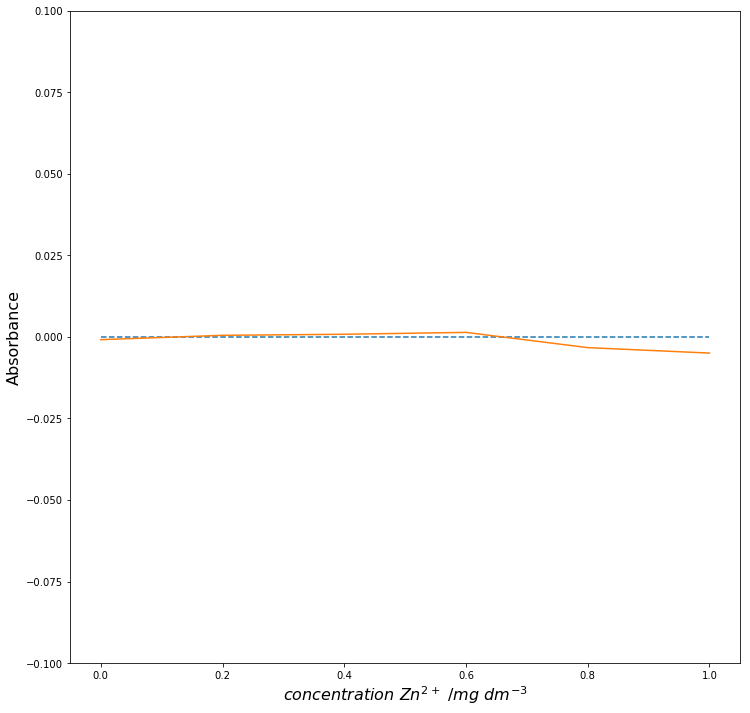

In [39]:
ab_res=m_zn_ab-(m_ab*zn_conc+c_ab)
plot(array([0,1]),array([0,0]),linestyle='--')
plot(zn_conc,ab_res)
ylim(-0.1,0.1)
xlabel('$ concentration\ Zn^{2+}$ /$ mg\ dm^{-3}$',fontsize=16)
ylabel('Absorbance',fontsize=16)
show()

* A river water sample passed through the spectrophotometer yielded an absorbance of 0.119. Use your linear fit to determining the concentration of Zn<sup>2+</sup> in this river.

In [40]:
#m_ab*zn_conc+c_ab
river_conc=(0.119-c_ab)/m_ab
river_conc

0.52428179909533945

## Exercise 2

![If you don't seen an image you may not be running the notebook on the same folder as the image files.](correlation.png "Correlation is not the same as causation.")

In most cases in your degree you will be fitting functions to data to extract parameters given well understood theory. There are other instances where people can use fitting to try and discover relationships between variables. Such process is fraught with difficulties, this is particularly true if we only have a small number of data points.

In this directory there is a file called [interesting_data.txt](interesting_data.txt) load the data into a variable. Fit two columns of data to a straight line and produce a plot of the original data together with your fit. 

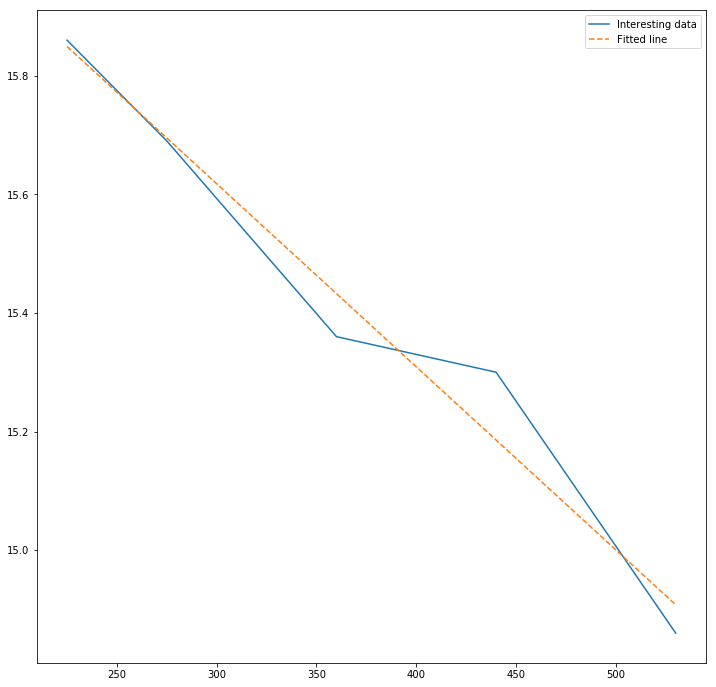

In [41]:
i_d=loadtxt('interesting_data.txt')
idx=i_d[:,0]
idy=i_d[:,1]
plot(idx,idy,label='Interesting data')
fit_i=polyfit(idx,idy,1,cov=True)
params_i=fit_i[0]
m_i=params_i[0]
c_i=params_i[1]
plot(idx,m_i*idx+c_i,label='Fitted line',linestyle='--')
legend()
show()

<p style="text-decoration:underline" title="US highway Fatality Rate per 100,000 vs. &#13; Fresh Lemons imported to the US from Mexico / metric tons  &#13;  &#13;
Source: Stephen R. Johnson; J. Chem. Inf. Model.  2008, 48, 25-26">Mouse over to learn what you've just plotted</p>

Look at the uncertainty reported for the coefficients and comment on the nature of relationship between the two variables - do you think our linear model is a good fit for the data?

## <a id="logbase"></a>Appendix: Change of log base

Here we want to show how to change the base of a logarithm from *a* to *b*

$$v=\log_a(u) \Leftrightarrow\\
\Leftrightarrow a^v=u \Leftrightarrow\\
\Leftrightarrow v \log_b(a)=\log_b(u) \Leftrightarrow\\
\Leftrightarrow v=\frac{\log_b(u)}{\log_b(a)}$$